In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis(EDA)

In [2]:
df= pd.read_csv('Cleaned_Insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.1+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1335.000000,1335.000000,1335.000000,1335.000000
mean,39.334831,30.643918,1.028464,14195.689803
std,13.717030,5.961499,1.191209,12508.848568
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.405000,0.000000,4927.281450
50%,39.000000,30.685000,1.000000,9869.810200
75%,51.000000,34.210000,2.000000,19470.492485
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.shape

(1335, 7)

In [7]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.116498,0.047450,0.268602
bmi,0.116498,1.000000,0.016132,0.181056
children,0.047450,0.016132,1.000000,0.035241
charges,0.268602,0.181056,0.035241,1.000000


## Correlation matrix  between variables and charges

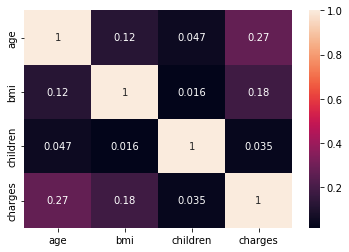

In [8]:
sns.heatmap(df.corr(), annot= True)

plt.show()

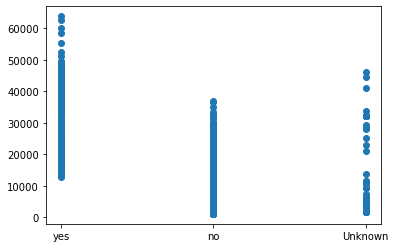

In [9]:
plt.scatter(df['smoker'],df['charges'])

In [10]:
df.groupby('region').mean()

,age,bmi,children,charges
region,,,,
Unknown,39.625000,30.920547,0.593750,21003.565692
northeast,39.214286,29.177338,1.022727,13666.210045
northwest,39.385113,29.271375,1.116505,12752.074922
southeast,39.073099,33.210643,1.017544,15562.955791
southwest,39.631410,30.580769,1.048077,13252.894097


<AxesSubplot:>

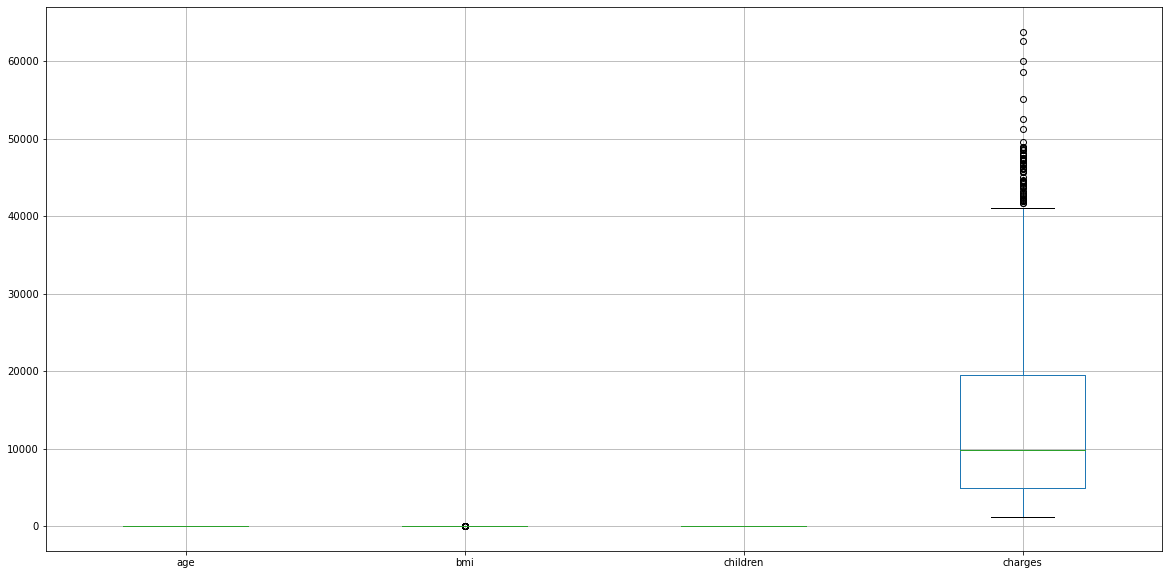

In [11]:
df.boxplot(figsize=(20,10))

## Preparing the data for Model fitting.

In [12]:
### Convert all string data to numerical data using one hot encoding
df_new = pd.get_dummies(df, prefix=['region'],columns=['region'])
df_new

,age,sex,bmi,children,smoker,charges,region_Unknown,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1330,50,male,30.970,3,no,10600.54830,0,0,1,0,0
1331,18,female,31.920,0,no,2205.98080,0,1,0,0,0
1332,18,female,36.850,0,no,1629.83350,0,0,0,1,0
1333,21,female,25.800,0,no,2007.94500,0,0,0,0,1


In [13]:
## dropping Southeast region beacuse it still gives us enough information for model fitting
df_new= df_new.drop(columns=['region_southeast'])

In [14]:
#Converting sex categories and smoker categories to 1 aand 0 
df_new.drop(df_new[df_new['smoker'] == 'Unknown'].index, inplace=True)
df_new['smoker'] = df_new['smoker'].replace({'yes': 1, 'no': 0})
df_new['sex'] = df_new ['sex'].replace({'female':0, 'male':0})

In [15]:
df_new

,age,sex,bmi,children,smoker,charges,region_Unknown,region_northeast,region_northwest,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,0,0
2,28,0,33.000,3,0,4449.46200,0,0,0,0
3,33,0,22.705,0,0,21984.47061,0,0,1,0
4,32,0,28.880,0,0,3866.85520,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1330,50,0,30.970,3,0,10600.54830,0,0,1,0
1331,18,0,31.920,0,0,2205.98080,0,1,0,0
1332,18,0,36.850,0,0,1629.83350,0,0,0,0
1333,21,0,25.800,0,0,2007.94500,0,0,0,1


In [16]:
## dropping column sex as 
df_new= df_new.drop(columns=['sex'])

In [17]:
### dropping unknown data from both smoker and region
df_new= df_new.drop(columns=['region_Unknown'])


df_new

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
0,19,27.900,0,1,16884.92400,0,0,1
1,18,33.770,1,0,1725.55230,0,0,0
2,28,33.000,3,0,4449.46200,0,0,0
3,33,22.705,0,0,21984.47061,0,1,0
4,32,28.880,0,0,3866.85520,0,1,0
...,...,...,...,...,...,...,...,...
1330,50,30.970,3,0,10600.54830,0,1,0
1331,18,31.920,0,0,2205.98080,1,0,0
1332,18,36.850,0,0,1629.83350,0,0,0
1333,21,25.800,0,0,2007.94500,0,0,1


In [18]:
df_new['smoker'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1271 entries, 0 to 1334
Series name: smoker
Non-Null Count  Dtype
--------------  -----
1271 non-null   int64
dtypes: int64(1)
memory usage: 19.9 KB


## Fit a linear regression model to our data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score    


In [20]:
# Define input and output variables
X = df_new.drop(columns=['charges','children'])
y = df_new['charges']

print(df_new.info())
print(y.info())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R squared score
r2_score = r2_score(y_test, y_pred)

# Output the mean squared error
r2_score

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1271 entries, 0 to 1334
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1271 non-null   int64  
 1   bmi               1271 non-null   float64
 2   children          1271 non-null   int64  
 3   smoker            1271 non-null   int64  
 4   charges           1271 non-null   float64
 5   region_northeast  1271 non-null   uint8  
 6   region_northwest  1271 non-null   uint8  
 7   region_southwest  1271 non-null   uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 63.3 KB
None
<class 'pandas.core.series.Series'>
Int64Index: 1271 entries, 0 to 1334
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1271 non-null   float64
dtypes: float64(1)
memory usage: 19.9 KB
None


0.6643146539389957

In [21]:
### Trying another model(ridge regression)
from sklearn.linear_model import Ridge

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Create a Ridge regression model
ridge = Ridge(alpha=1.0)

# Fit the model to the training data
ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge.predict(X_test)

# Calculate the R squared score
r2 = r2_score(y_test, y_pred)

# Output the R squared score
print(r2)


0.6651796318792509
